### 3.	Lakukan semua analisa Data dengan Visualisasi, proses grouping, dan anova (materi 6)
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
dataset = "Melbourne_housing_FULL.csv"
df = pd.read_csv(dataset)

### Visualisasi Pie chart

In [278]:
#Membersihkan data
df = df.dropna(subset=['Price'])

In [279]:
#Melakukan Grouping
df_grouped = df.groupby('Type')['Price'].mean()

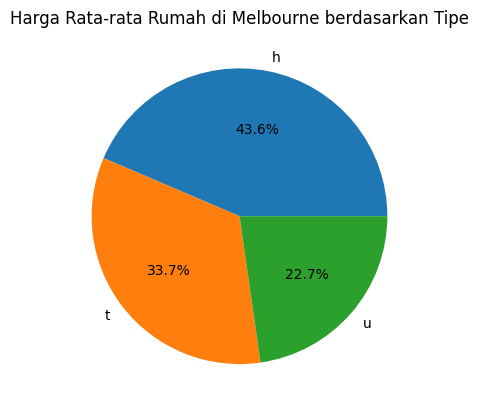

In [280]:
#Visualisasi dengan Pie chart
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Harga Rata-rata Rumah di Melbourne berdasarkan Tipe')
plt.show()

### Visualisasi Bar Chart

In [281]:
# Clean data
df = df.dropna(subset=['Price'])

In [282]:
#Grouping berdasarkan 'Suburn' dan menghitung median 'Price'.
df_grouped = df.groupby('Suburb')['Price'].median().sort_values(ascending=False)[:10]

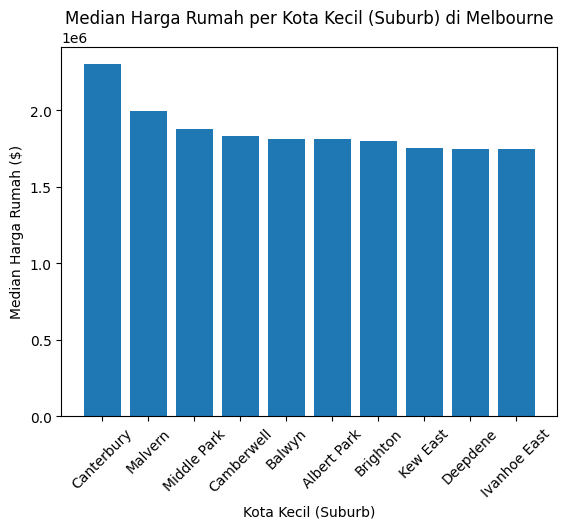

In [283]:
#Visualisasi dengan Bar Chart
plt.bar(df_grouped.index, df_grouped.values)
plt.title('Median Harga Rumah per Kota Kecil (Suburb) di Melbourne')
plt.xlabel('Kota Kecil (Suburb)')
plt.ylabel('Median Harga Rumah ($)')
plt.xticks(rotation=45)
plt.show()

###Visualisasi Line Graphs

In [284]:
#Membersihkan data
df = df.dropna(subset=['Price'])
df = df[df['Price'] < 1000000]

In [285]:
# Mengubah tipe data string 'Date' ke tipe data object 'Datetime'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [286]:
#Grouping berdasarkan Date dan menghitung median 'Price'
df_grouped = df.groupby('Date')['Price'].median()

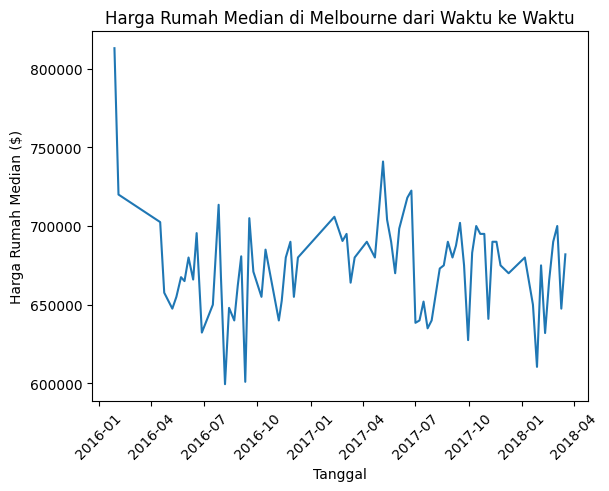

In [287]:
#Visualisasi dengan Line Chart
plt.plot(df_grouped.index, df_grouped.values)
plt.title('Harga Rumah Median di Melbourne dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Rumah Median ($)')
plt.xticks(rotation=45)
plt.show()

In [288]:
# Clean data
df = df.dropna(subset=['Price'])

In [289]:
# Group data by date and calculate mean price
df_grouped = df.groupby('Date')['Price'].mean()

### Visualisasi Scatter Plot

In [291]:
#Membersihkan data
df = df.dropna(subset=['Price'])
df = df[df['Price'] < 3000000] # Kecualikan outlier

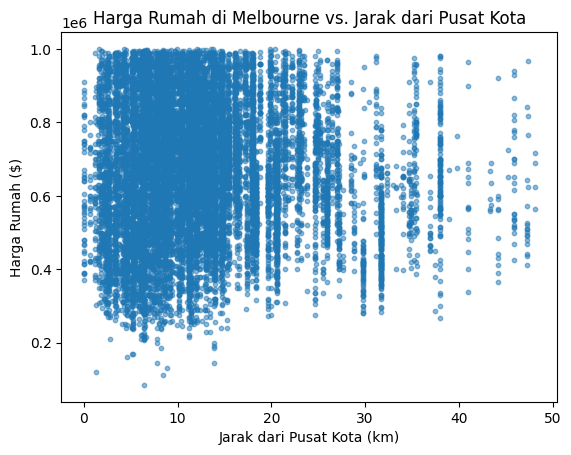

In [292]:
#Visualisasi dengan Scatter Plot
plt.scatter(df['Distance'], df['Price'], s=10, alpha=0.5)
plt.title('Harga Rumah di Melbourne vs. Jarak dari Pusat Kota')
plt.xlabel('Jarak dari Pusat Kota (km)')
plt.ylabel('Harga Rumah ($)')
plt.show()

### Visualisasi Heatmap

In [293]:
#Membersihkan Data
df = df.dropna(subset=['Price'])
df = df[df['Price'] < 1000000]
df = df.select_dtypes(include=[float, int])

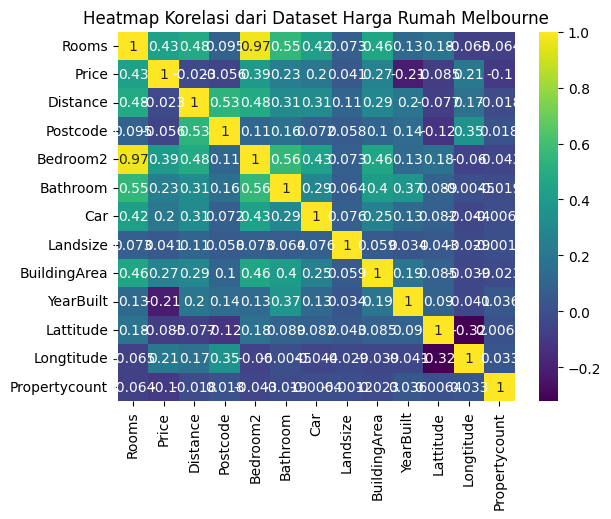

In [294]:
#Visualisasi dengan Heatmap
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap Korelasi dari Dataset Harga Rumah Melbourne')
plt.show()

### Visualisasi Statistik - Histogram

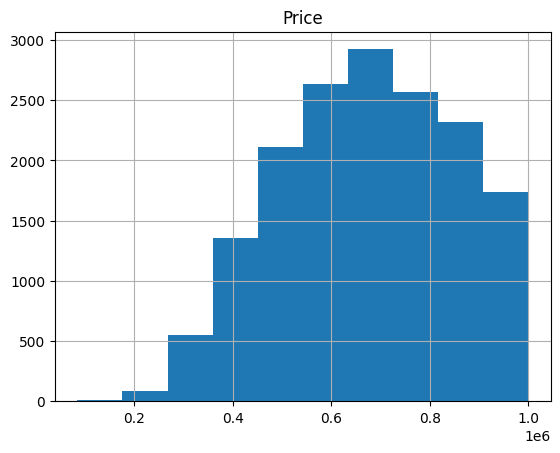

In [295]:
df.hist(column='Price', bins=10);

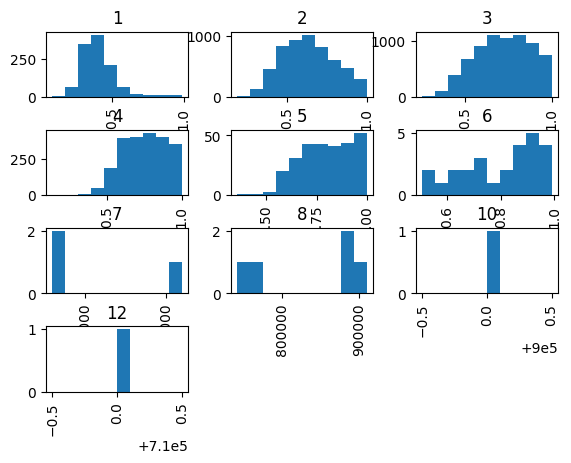

In [296]:
df.hist(column='Price', by='Rooms', bins=10);

### Grouping

In [7]:
#Menampilkan nilai unik data series
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [8]:
#Membuat dataframe baru dengan kolom 'Regionname','Rooms', dan 'Price'
df_group_one = df[['Regionname','Rooms','Price']]

In [9]:
#Melakukan grouping
df_group_one = df_group_one.groupby(['Regionname'],as_index=False).mean()
df_group_one

,Regionname,Rooms,Price
0,Eastern Metropolitan,3.396847,1.108723e+06
1,Eastern Victoria,3.539474,7.143282e+05
2,Northern Metropolitan,2.822748,8.614840e+05
3,Northern Victoria,3.512315,6.190512e+05
4,South-Eastern Metropolitan,3.284646,8.776827e+05
5,Southern Metropolitan,2.973978,1.395928e+06
6,Western Metropolitan,3.087072,8.376153e+05
7,Western Victoria,3.295652,4.326068e+05


In [305]:
#Melakukan grouping
df_gptest = df[['Regionname','Rooms','Price']]
grouped_test1 = df_gptest.groupby(['Regionname','Rooms'],as_index=False).mean()
grouped_test1

,Regionname,Rooms,Price
0,Eastern Metropolitan,1,5.333000e+05
1,Eastern Metropolitan,2,7.289280e+05
2,Eastern Metropolitan,3,1.017051e+06
3,Eastern Metropolitan,4,1.284803e+06
4,Eastern Metropolitan,5,1.533335e+06
...,...,...,...
65,Western Victoria,3,4.295605e+05
66,Western Victoria,4,4.419792e+05
67,Western Victoria,5,5.850000e+05
68,Western Victoria,6,NaN


In [306]:
#Melakukan pivot data 
grouped_pivot = grouped_test1.pivot(index='Regionname',columns='Rooms')
grouped_pivot

Price                                
Rooms                                  1              2             3    
Regionname                                                               
Eastern Metropolitan        533300.000000  728928.038117  1.017051e+06  \
Eastern Victoria            462000.000000  479166.666667  6.577866e+05   
Northern Metropolitan       422378.830317  743206.263311  9.051467e+05   
Northern Victoria           942000.000000  542700.000000  5.425167e+05   
South-Eastern Metropolitan  396931.818182  621100.515464  8.395236e+05   
Southern Metropolitan       446617.100000  840769.046467  1.470444e+06   
Western Metropolitan        390100.755725  646524.963360  8.179813e+05   
Western Victoria                      NaN  344285.714286  4.295605e+05   

                                                                       
Rooms                                 4             5             6    
Regionname                                                             
Eastern Metropolitan        1.284803e+06  1.533335e+06  1.664569e+06  \
Eastern Victoria            7.422061e+05  1.048769e+06           NaN   
Northern Metropolitan       1.058603e+06  1.180822e+06  1.244844e+06   
Northern Victoria           6.828417e+05  8.942857e+05  1.016667e+06   
South-Eastern Metropolitan  1.033385e+06  1.133482e+06  1.376000e+06   
Southern Metropolitan       2.024676e+06  2.637495e+06  2.640057e+06   
Western Metropolitan        1.013675e+06  1.264379e+06  1.276679e+06   
Western Victoria            4.419792e+05  5.850000e+05           NaN   

                                                                            
Rooms                                 7          8          9          10   
Regionname                                                                  
Eastern Metropolitan        2.136667e+06   960000.0        NaN        NaN  \
Eastern Victoria                     NaN   910000.0        NaN        NaN   
Northern Metropolitan       1.050375e+06  1773312.5        NaN  1850000.0   
Northern Victoria                    NaN        NaN        NaN        NaN   
South-Eastern Metropolitan  1.215000e+06        NaN  1380000.0  2115000.0   
Southern Metropolitan       2.542429e+06  2365353.2        NaN  2137500.0   
Western Metropolitan        1.242000e+06  1143000.0        NaN        NaN   
Western Victoria                     NaN        NaN        NaN        NaN   

                                                  
Rooms                              12         16  
Regionname                                        
Eastern Metropolitan              NaN  5000000.0  
Eastern Victoria                  NaN        NaN  
Northern Metropolitan             NaN        NaN  
Northern Victoria                 NaN        NaN  
South-Eastern Metropolitan        NaN        NaN  
Southern Metropolitan       4700000.0        NaN  
Western Metropolitan              NaN        NaN  
Western Victoria             710000.0        NaN

In [307]:
# melakukan pivot data dengan mengisi missing value (NaN) dengan nilai 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

Price                                
Rooms                                  1              2             3    
Regionname                                                               
Eastern Metropolitan        533300.000000  728928.038117  1.017051e+06  \
Eastern Victoria            462000.000000  479166.666667  6.577866e+05   
Northern Metropolitan       422378.830317  743206.263311  9.051467e+05   
Northern Victoria           942000.000000  542700.000000  5.425167e+05   
South-Eastern Metropolitan  396931.818182  621100.515464  8.395236e+05   
Southern Metropolitan       446617.100000  840769.046467  1.470444e+06   
Western Metropolitan        390100.755725  646524.963360  8.179813e+05   
Western Victoria                 0.000000  344285.714286  4.295605e+05   

                                                                       
Rooms                                 4             5             6    
Regionname                                                             
Eastern Metropolitan        1.284803e+06  1.533335e+06  1.664569e+06  \
Eastern Victoria            7.422061e+05  1.048769e+06  0.000000e+00   
Northern Metropolitan       1.058603e+06  1.180822e+06  1.244844e+06   
Northern Victoria           6.828417e+05  8.942857e+05  1.016667e+06   
South-Eastern Metropolitan  1.033385e+06  1.133482e+06  1.376000e+06   
Southern Metropolitan       2.024676e+06  2.637495e+06  2.640057e+06   
Western Metropolitan        1.013675e+06  1.264379e+06  1.276679e+06   
Western Victoria            4.419792e+05  5.850000e+05  0.000000e+00   

                                                                            
Rooms                                 7          8          9          10   
Regionname                                                                  
Eastern Metropolitan        2.136667e+06   960000.0        0.0        0.0  \
Eastern Victoria            0.000000e+00   910000.0        0.0        0.0   
Northern Metropolitan       1.050375e+06  1773312.5        0.0  1850000.0   
Northern Victoria           0.000000e+00        0.0        0.0        0.0   
South-Eastern Metropolitan  1.215000e+06        0.0  1380000.0  2115000.0   
Southern Metropolitan       2.542429e+06  2365353.2        0.0  2137500.0   
Western Metropolitan        1.242000e+06  1143000.0        0.0        0.0   
Western Victoria            0.000000e+00        0.0        0.0        0.0   

                                                  
Rooms                              12         16  
Regionname                                        
Eastern Metropolitan              0.0  5000000.0  
Eastern Victoria                  0.0        0.0  
Northern Metropolitan             0.0        0.0  
Northern Victoria                 0.0        0.0  
South-Eastern Metropolitan        0.0        0.0  
Southern Metropolitan       4700000.0        0.0  
Western Metropolitan              0.0        0.0  
Western Victoria             710000.0        0.0

In [308]:
#Melakukan grouping dari  "Rooms" berdasarkan rata-rata "Price"
df_gptest2 = df[['Rooms','Price']]
grouped_test_bodystyle = df_gptest2.groupby(['Rooms'],as_index= False).mean()
grouped_test_bodystyle

,Rooms,Price
0,1,4.328888e+05
1,2,7.594844e+05
2,3,1.028500e+06
3,4,1.369597e+06
4,5,1.818862e+06
5,6,1.882613e+06
6,7,1.791675e+06
7,8,1.716858e+06
8,9,1.380000e+06
9,10,2.018000e+06


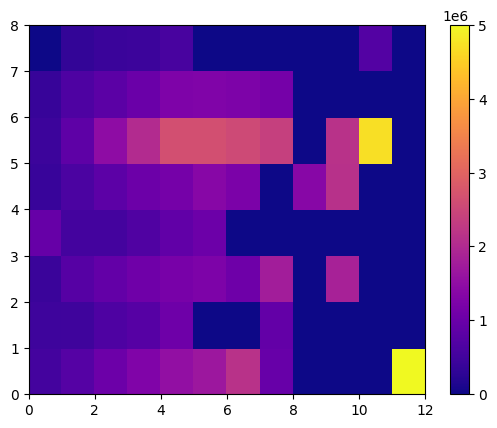

In [309]:
#Visualisasi dengan Heatmap
plt.pcolor(grouped_pivot, cmap='plasma')
plt.colorbar()
plt.show()

### ANOVA: Analysis of Variance
F-Score: ANOVA mengasumsikan rata-rata semua kelompok adalah sama, anova akan menghitung seberapa jauh rata-rata yang sebenarnya menyimpang dari asumsi, dan melaporkannya sebagai F-Score. Skor yang lebih besar berarti ada perbedaan yang lebih besar antara rata-rata.
P-Value: Nilai-P menunjukkan seberapa signifikan secara statistik nilai skor yang dihitung.

In [325]:
#Mengelompokan data 'Regionname' & 'Price' berdasarkan 'Regionname'
grouped_data=df[['Regionname', 'Price']].groupby(['Regionname'])
grouped_data.head(2)

,Regionname,Price
1,Northern Metropolitan,1480000.0
2,Northern Metropolitan,1035000.0
4,Northern Metropolitan,1465000.0
5,Northern Metropolitan,850000.0
6,Northern Metropolitan,1600000.0
66,Western Metropolitan,840000.0
67,Western Metropolitan,730000.0
68,Western Metropolitan,770000.0
70,Western Metropolitan,603000.0
71,Western Metropolitan,700000.0


In [326]:
#Menghapus baris atau data yang memiliki nilai kosong atau hilang pada kolom 'Price'
df.dropna(subset=['Price'], inplace=True)

In [321]:
#Mengelompokkan data berdasarkan 'Regionname'
grouped_data = df[['Regionname', 'Price']].groupby(['Regionname'])

In [312]:
#ANOVA 
f_val, p_val = stats.f_oneway(
    grouped_data.get_group('Northern Metropolitan')['Price'],
    grouped_data.get_group('Western Metropolitan')['Price'],
    grouped_data.get_group('Southern Metropolitan')['Price'],
    grouped_data.get_group('Eastern Metropolitan')['Price'],
    grouped_data.get_group('South-Eastern Metropolitan')['Price'],
    grouped_data.get_group('Northern Victoria')['Price'],
    grouped_data.get_group('Eastern Victoria')['Price'],
    grouped_data.get_group('Western Victoria')['Price']
)

In [315]:
#Hasil Anova
print("ANOVA results: F-Score =", f_val, ", P-Value =", p_val)

ANOVA results: F-Score = 695.0002123173488 , P-Value = 0.0
